In [196]:
import sqlite3
import pandas as pd
from dateutil import relativedelta
import operator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# @author: Umar Ayub
# @date: 23rd February 2018
# Part 2 of Coding Challenge Data Exercise using IPython for sharing and readability and SQlite3 for simplicity

In [224]:
# Data Exercise 1 Provide a list of male patients in the database and the counts of patients by gender.
conn = sqlite3.connect('openmrs.db')
c = conn.cursor()  # Connect to db for sql querying and data processing

In [225]:
males = c.execute("SELECT * FROM patient WHERE patient.gender = 'M';")
print males.fetchall()  # List of male patients, an empty list is returned by fetchall() when no rows are available.


[(u'M', u'MRN000002', 2, u'1941-05-01', 0), (u'M', u'MRN000006', 6, u'1962-04-21', 0), (u'M', u'MRN000013', 13, u'1974-11-02', 1), (u'M', u'MRN000016', 16, u'1971-06-27', 0), (u'M', u'MRN000017', 17, u'1995-10-24', 0), (u'M', u'MRN000018', 18, u'2003-10-11', 0), (u'M', u'MRN000020', 20, u'2003-06-21', 1), (u'M', u'MRN000036', 36, u'1976-09-16', 1), (u'M', u'MRN000039', 39, u'1964-08-18', 0), (u'M', u'MRN000044', 44, u'1966-01-02', 1), (u'M', u'MRN000048', 48, u'1975-02-14', 1), (u'M', u'MRN000053', 53, u'1966-12-02', 0), (u'M', u'MRN000065', 65, u'1978-07-08', 0), (u'M', u'MRN000075', 75, u'1956-07-11', 1), (u'M', u'MRN000077', 77, u'1979-10-20', 1), (u'M', u'MRN000092', 92, u'1984-03-25', 0), (u'M', u'MRN000095', 95, u'2003-05-06', 1), (u'M', u'MRN000098', 98, u'1960-06-13', 1), (u'M', u'MRN000109', 109, u'1966-01-17', 1), (u'M', u'MRN000118', 118, u'1997-09-19', 1), (u'M', u'MRN000122', 122, u'1957-04-17', 0), (u'M', u'MRN000127', 127, u'1970-06-21', 1), (u'M', u'MRN000131', 131, u'1

In [226]:
count_males = c.execute("SELECT COUNT(*) FROM patient WHERE patient.gender = 'M';")
print count_males.fetchall()
count_females = c.execute("SELECT COUNT(*) FROM patient WHERE patient.gender = 'F';")
print count_females.fetchall()
# Total Females = 3484
# Total Males = 1800

[(1800,)]
[(3484,)]


In [223]:
# Data Exercise 2: Visualization of diagnosed name and patient gender and age.

In [201]:
# Step 1: Load SQL query results into a dataframe
df = pd.read_sql_query("SELECT D.id as DiagnosesID, D.name, E.id as EncounterID, E.patient_id, E.encounter_datetime, P.gender, P.birthdate" 
                      " FROM diagnosis D" 
                      " JOIN encounter_diagnosis ED ON D.id = ED.diagnosis_id"
                      " JOIN encounter E ON ED.encounter_id = E.id"
                      " JOIN patient P ON E.patient_id = P.id;", conn)

encounter_Date = [i.split(' ')[0] for i in df["encounter_datetime"]]
df["encounter_datetime"] = encounter_Date

In [228]:
# Calculate Age at time of Diagnosis and Finalize Dataframe
for i in df.index:
    birthday = df.ix[i,"birthdate"]
    year,month,day = birthday.split('-')[0], birthday.split('-')[1], birthday.rsplit('-')[-1]
    b = datetime(int(year),int(month),int(day))
    
    currday = df.ix[i,"encounter_datetime"]
    year1,month1,day1 = currday.split('-')[0], currday.split('-')[1], currday.rsplit('-')[-1]
    t = datetime(int(year1),int(month1),int(day1))
    
    df.at[i, 'age'] = relativedelta.relativedelta(t, b).years
print df

      DiagnosesID                                name  EncounterID  \
0               1                             MALARIA           33   
1               2  RESPIRATORY TRACT INFECTION, UPPER           39   
2               3                          BRONCHITIS          198   
3               4               PERIPHERAL NEUROPATHY          200   
4               5                           DYSPEPSIA          205   
5               6                     GASTROENTERITIS          211   
6               1                             MALARIA          213   
7               7                             MYALGIA          243   
8               1                             MALARIA          246   
9               4               PERIPHERAL NEUROPATHY          250   
10              2  RESPIRATORY TRACT INFECTION, UPPER          270   
11              8                          AMOEBIASIS          272   
12              9                           PAROTITIS          273   
13             10   

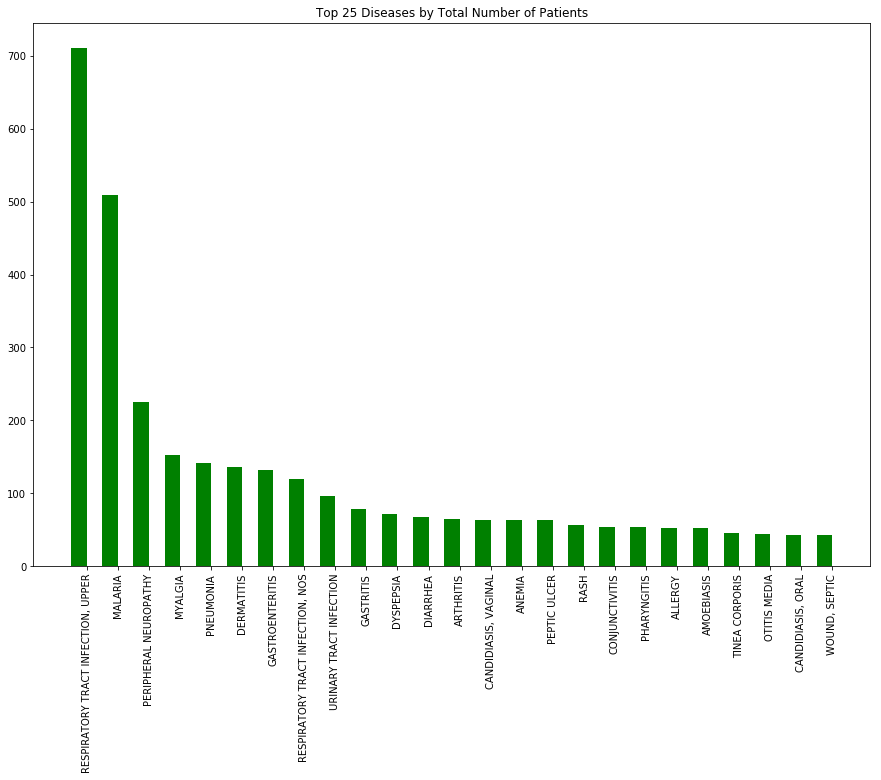

In [203]:
# Diagnoses Visualization
# Top 25 diagnoses
diagnoses_counts = {}
for i in df["name"]:
    diagnoses_counts[i] = diagnoses_counts.get(i, 0) + 1
top25 = sorted(diagnoses_counts.items(), key=operator.itemgetter(1))[::-1]
top25 = top25[:25]

disease = []
count = []
for ind, val in enumerate(top25):
    disease.append(val[0].encode('ascii','ignore'))
    count.append(str(val[1]).encode('ascii','ignore'))
count = map(int, count)

N = 25
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
ax.bar(ind, count, width, color = 'g', align = 'center')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(disease)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(rotation='vertical')
plt.title('Top 25 Diseases by Total Number of Patients')
plt.show(3)



name                                   gender
ABDOMINAL PAIN                         F         31.0
                                       M         31.0
ABDOMINAL SWELLING                     F         31.0
ABSCESS                                F         36.0
                                       M         28.0
ACNE                                   F         30.0
ADENITIS, NOS                          F         41.0
                                       M         35.0
ADENITIS, TUBERCULOUS                  F         34.0
ALLERGY                                F         32.0
                                       M         39.0
AMOEBIASIS                             F         32.0
                                       M         32.5
ANEMIA                                 F         32.0
                                       M         36.5
ANEMIA, IRON DEFICIENCY                F         42.0
                                       M         34.0
ANOREXIA                            

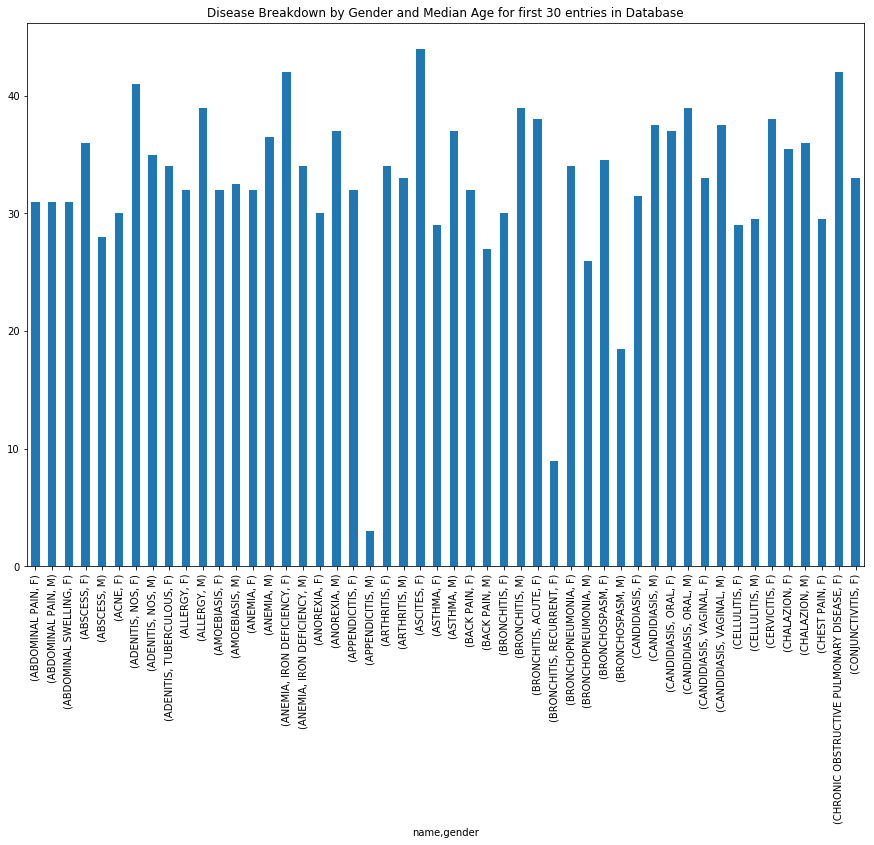

In [235]:
# Data visualization on diagnosed name and patient gender and age.
data = df.groupby(['name', 'gender'])['age'].median().head(50)
print data
print data.plot.bar(figsize=(15,10), title = 'Disease Breakdown by Gender and Median Age for first 30 entries in Database')


Axes(0.125,0.125;0.775x0.755)


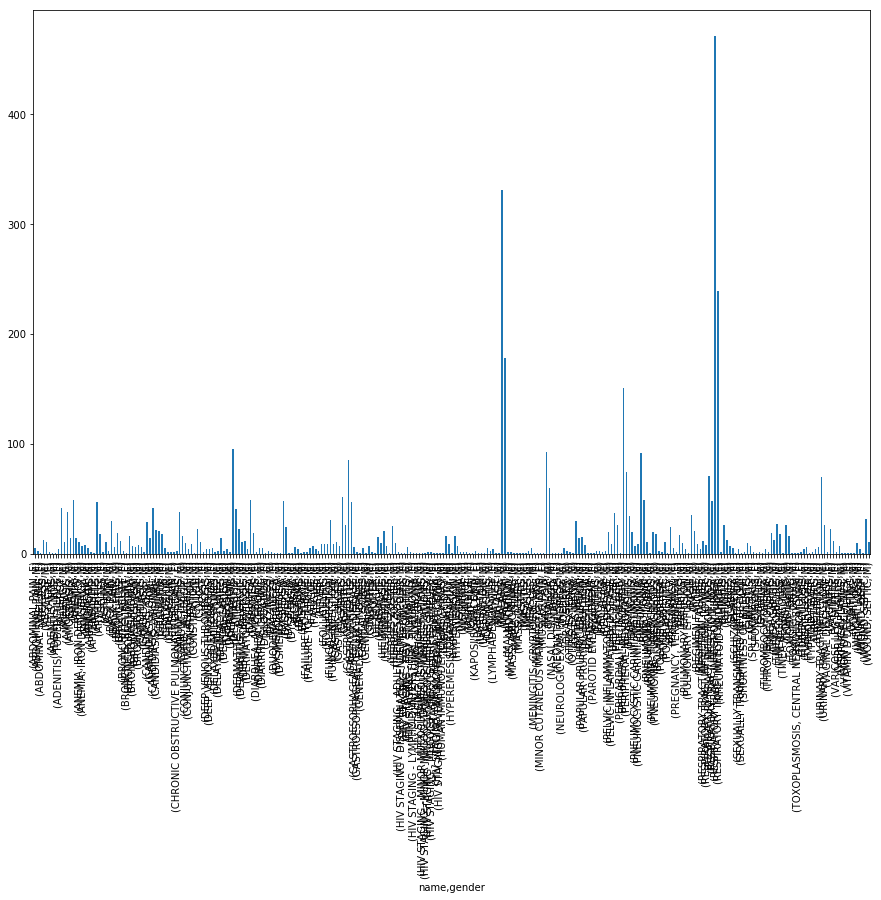

In [207]:
data2 = df.groupby(['name', 'gender'])['age'].size()
print data2.plot.bar(figsize=(15,10))
